<a href="https://colab.research.google.com/github/duke9/Lidar-test/blob/main/lidarTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<function matplotlib.pyplot.show>

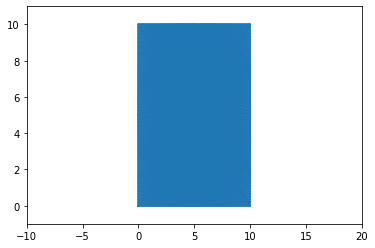

In [126]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.transforms as mtransforms
import matplotlib.text as mtext

class MyLine(lines.Line2D):
    def __init__(self, *args, **kwargs):
        self.text = mtext.Text(0, 0, '')
        lines.Line2D.__init__(self, *args, **kwargs)
        self.text.set_text(self.get_label())

    
# square_room_corners_x ,square_room_corners_y= [0,10,10],[0,0,10]
square_room_corners_x ,square_room_corners_y= [0,10,10,0,0],[0,0,10,10,0]
max_range = 10
min_range = 1
   

fig, ax = plt.subplots()
# square_room_corners_x ,square_room_corners_y= [0,10,10,0,0],[0,0,10,10,0]
line = MyLine(square_room_corners_x, square_room_corners_y,  ms=12, )

ax.add_line(line)
# ax.plot(1,1,'o')
# print(one_scan[1][1])
# for i in range(360):
#     angle_in_radians = (i) * (np.pi/180)
#     x = one_scan[i][1]*np.sin(angle_in_radians) 
#     y = one_scan[i][1]*np.cos(angle_in_radians) 
#     ax.plot(x,y,'o')


# square_room_corners_x ,square_room_corners_y= [0,10,10,0,0],[0,0,10,10,0]



class Test_lidar_scanner():
    def __init__(self, start_angle,rotations_per_second, envoronment):
        self.angle = start_angle
        self.envoronment = envoronment
        self.rps = rotations_per_second
        self.x = 5
        self.y = 5
        self.on = False
        ax.plot(self.x,self.y,'o')
    
    def scan(self):
        self.on = True
        while(self.on):
            rotation = []
            for i in range(0,360):
                rotation.append((i,self.envoronment(self.angle+i,self.x,self.y)))
            yield rotation
            time.sleep(1/self.rps)

def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

def intersection_coords(laser,wall):
    l1x,l1y,l2x,l2y = laser
    w1x,w1y,w2x,w2y = wall

    xdelta = (l1x-l2x,w1x-w2x)
    ydelta = (l1y-l2y,w1y-w2y)

    div = det(xdelta, ydelta)
    if div == 0:
       return None
    
    d = (det((l1x,l1y),(l2x,l2y)), det((w1x,w1y),(w2x,w2y)))
    x = det(d, xdelta) / div
    y = det(d, ydelta) / div
    if((x+.1 < w1x and x+.1 < w2x ) or (x-.1 > w1x and x-.1 > w2x)):
        return None
    if((y+.1 < w1y and y+.1 < w2y ) or (y-.1 > w1y and y-.1 > w2y)):
        return None
    laserline = MyLine([l1x,x], [l1y,y],  ms=12, )
    # ax.add_line(laserline)
    return x, y

def laser_get_coordinates(x,y,angle,distance):
    angle_in_radians = angle*(np.pi/180)
    change_x = distance*np.sin(angle_in_radians)
    change_y = distance*np.cos(angle_in_radians)
    laserline = MyLine([x,x+change_x], [y,y+change_y],  ms=12, )
    # ax.add_line(laserline)
    return x,y,x+change_x,y+change_y

def distance_to_wall(laser,wall):
    intersect_coods = intersection_coords(laser,wall)
    if( intersect_coods == None or intersect_coods==(laser[0],laser[1]) ):
        return None
    else:
        laserline = MyLine([laser[0],intersect_coods[0]], [laser[1],intersect_coods[1]],  ms=12, )
        ax.add_line(laserline)
        distance = np.sqrt((laser[0]-intersect_coods[0])**2 +(laser[1]-intersect_coods[1])**2)
        # print(distance ,laser,intersect_coods)
        return distance
    return 0

def square_room(spin_angle,x,y):
    # print(spin_angle,x,y)
    distance = max_range
    corners = square_room_corners_x ,square_room_corners_y;
    array_of_of_walls = []
    for i in range(len(corners[0])):
        array_of_of_walls.append([[corners[0][i],corners[1][i]],[corners[0][(i+1)%len(corners[1])],corners[1][(i+1)%len(corners[1])]] ])
    for i in array_of_of_walls:
        temp_distance = distance_to_wall(laser_get_coordinates(x,y,spin_angle,distance),(i[0][0],i[0][1],i[1][0],i[1][1]))
        if(temp_distance != None):
            distance = min(distance,temp_distance)
    # return (distance if distance > min_range else min_range)
    if distance == max_range:
        return max_range;
    else:
        return distance

def zero_room(spin_angle,x,y):
    return 0;

def lidar_test_data(time_division):
    i = 1
    while 1:
        yield i
        i += 1
        print("incrementing i to :"+str(i))
        time.sleep(1/time_division)

new_scanner = Test_lidar_scanner(90,1,square_room)  
one_scan = None
one_scan = next(new_scanner.scan())


plt.xlim(-10, 20)
plt.ylim(-1, 11) 
plt.show    # set the ylim to bottom, top

# for i in new_scanner.scan():
#     print(i)

# laser = l1x,l1y,l2x,l2y
# wall = w1x,w1y,w2x,w2y 
# laser = 0,0,10,10
# wall = 0,10,10,0 
# print(intersection_coords(laser,wall))
# print(laser_get_coordinates(1,1,360,10))

<function matplotlib.pyplot.show>

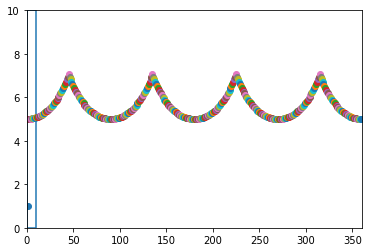

In [127]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.transforms as mtransforms
import matplotlib.text as mtext
import numpy as np

class MyLine(lines.Line2D):
    def __init__(self, *args, **kwargs):
        self.text = mtext.Text(0, 0, '')
        lines.Line2D.__init__(self, *args, **kwargs)
        self.text.set_text(self.get_label())

    

   

fig, ax = plt.subplots()
x, y = np.random.rand(2, 20)
square_room_corners_x ,square_room_corners_y= [0,10,10,0,0],[0,0,10,10,0]
line = MyLine(square_room_corners_x, square_room_corners_y,  ms=12, )

ax.add_line(line)
ax.plot(1,1,'o')
# print(one_scan[1][1])
for x in range(360):
    # print(one_scan)
    ax.plot(x,one_scan[x][1],'o')
plt.xlim(0, 360)
plt.ylim(0, 10) 
plt.show    # set the ylim to bottom, top




5.000761640219537
theda:  0.0 radius 5.0
theda:  0.017453292519943295 radius 5.000761640219537
theda:  0.03490658503988659 radius 5.0030477214941085
theda:  0.05235987755982989 radius 5.0068617299896045
theda:  0.06981317007977318 radius 5.012209490405861
theda:  0.08726646259971647 radius 5.019099187716737
theda:  0.10471975511965978 radius 5.027541397817582
theda:  0.12217304763960307 radius 5.037549127294242
theda:  0.13962634015954636 radius 5.04913786259309
theda:  0.15707963267948966 radius 5.062325628940014
theda:  0.17453292519943295 radius 5.077133059428725
theda:  0.19198621771937624 radius 5.093583474776071
theda:  0.20943951023931956 radius 5.111702974325146
theda:  0.22689280275926285 radius 5.131520538966958
theda:  0.24434609527920614 radius 5.15306814674949
theda:  0.2617993877991494 radius 5.176380902050415
theda:  0.2792526803190927 radius 5.20149717930801
theda:  0.29670597283903605 radius 5.22845878243574
theda:  0.3141592653589793 radius 5.257311121191336
theda:  0

<function matplotlib.pyplot.show>

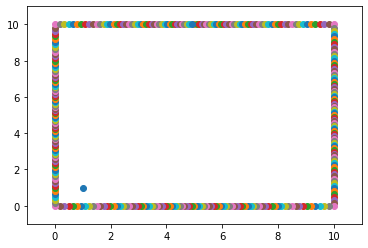

In [129]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.transforms as mtransforms
import matplotlib.text as mtext
import numpy as np

class MyLine(lines.Line2D):
    def __init__(self, *args, **kwargs):
        self.text = mtext.Text(0, 0, '')
        lines.Line2D.__init__(self, *args, **kwargs)
        self.text.set_text(self.get_label())

    

   

fig, ax = plt.subplots()
x, y = np.random.rand(2, 20)
square_room_corners_x ,square_room_corners_y= [0,10,10,0,0],[0,0,10,10,0]
line = MyLine(square_room_corners_x, square_room_corners_y,  ms=12, )

ax.add_line(line)
ax.plot(1,1,'o')
print(one_scan[1][1])
for i in range(360):
    angle_in_radians = (i) * (np.pi/180)
    x = one_scan[i][1]*np.sin(angle_in_radians) + 5
    y = one_scan[i][1]*np.cos(angle_in_radians) + 5
    print("theda: ",angle_in_radians,"radius",one_scan[i][1])
    ax.plot(x,y,'o')
plt.xlim(-1, 11)
plt.ylim(-1, 11) 
plt.show    # set the ylim to bottom, top


